In [1]:
from LoopStructural import GeologicalModel
from LoopStructural.visualisation import LavaVuModelViewer
from LoopStructural.datasets import load_intrusion
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.decomposition.pca module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.decomposition. Anything that cannot be imported from sklearn.decomposition is now part of the private API.
  warnings.warn(message, FutureWarning)
Cannot import Surfe


In [4]:
data, bb = load_intrusion()

In [5]:
fault_data = data[data['type']=='fault']

In [6]:
fault_data

,X,Y,Z,val,coord,type,nx,ny,nz
0,0.0,5500.0,0.0,0.0,0.0,fault,NaN,NaN,NaN
1,300.0,5500.0,0.0,0.0,0.0,fault,NaN,NaN,NaN
2,600.0,5500.0,0.0,0.0,0.0,fault,NaN,NaN,NaN
3,900.0,5500.0,0.0,0.0,0.0,fault,NaN,NaN,NaN
4,1200.0,5500.0,0.0,0.0,0.0,fault,NaN,NaN,NaN
5,1500.0,5500.0,0.0,0.0,0.0,fault,NaN,NaN,NaN
6,1800.0,5500.0,0.0,0.0,0.0,fault,NaN,NaN,NaN
7,2100.0,5500.0,0.0,0.0,0.0,fault,NaN,NaN,NaN
8,2400.0,5500.0,0.0,0.0,0.0,fault,NaN,NaN,NaN
9,2700.0,5500.0,0.0,0.0,0.0,fault,NaN,NaN,NaN


In [7]:
model = GeologicalModel(bb[0,:],bb[1,:])
model.set_model_data(fault_data)
fault = model.create_and_add_fault('fault',
                                   0,
                                   nelements=2000,
                                   steps=4,
                                   interpolatortype='PLI',
                                  buffer=0.3
                                  )


In [14]:
bedding_val = np.random.random((40,3))
bedding_val[:,0]*=bb[1,0]
bedding_val[:,1]*=bb[1,1]
bedding_val[:,2]=-200
print(fault['feature'].evaluate(model.scale(bedding_val)))
bedding_val[~fault['feature'].evaluate(model.scale(bedding_val)),2]=-1500

print(bedding_val)

[False  True  True False False  True False False False False  True False
 False  True False  True  True False  True False  True  True False  True
 False  True  True False False  True False  True  True  True False  True
 False  True False False]
[[ 6333.55707194  9680.14855262 -1500.        ]
 [ 7778.44455366  3541.12251629  -200.        ]
 [ 8560.00989934  2390.76817568  -200.        ]
 [ 8440.55088384  5887.18298708 -1500.        ]
 [ 7830.90972977  7863.24585745 -1500.        ]
 [ 9555.02094471  3795.31231166  -200.        ]
 [ 2339.13063834  6662.0338699  -1500.        ]
 [ 6305.72508016  6571.74749482 -1500.        ]
 [  258.08781057  6389.38630352 -1500.        ]
 [ 4907.92688674  9190.26379101 -1500.        ]
 [ 3054.05820637  3611.90739466  -200.        ]
 [ 8984.52082103  9869.26923064 -1500.        ]
 [ 1129.23185747  8096.65392406 -1500.        ]
 [ 1610.25681298  2473.37171624  -200.        ]
 [ 5641.72482627  6292.8086273  -1500.        ]
 [ 6382.95425973  2262.83956801  -2


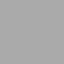

In [15]:
viewer = LavaVuModelViewer(model)
viewer.add_isosurface(fault['feature'],isovalue=0)
viewer.add_points(model.scale(bedding_val),name='points',pointsize=5)
viewer.interactive()


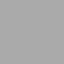

In [34]:
model = GeologicalModel(bb[0,:],bb[1,:])
model.set_model_data(data)
fault = model.create_and_add_fault('fault',
                                   -1000,
                                   nelements=2000,
                                   steps=4,
                                   interpolatortype='PLI',
                                  buffer=0.3,
                                   solver='pyamg'
                                  )
strati = model.create_and_add_foliation('strati',
                                        nelements=10000,
                                        interpolatortype='PLI',
                                        cgw=0.1,
                                        solver='pyamg',
                                        buffer=0.5
                                       )

viewer = LavaVuModelViewer(model)
viewer.add_isosurface(strati['feature'],isovalue=0)
viewer.add_isosurface(fault['feature'],isovalue=0)

viewer.add_data(strati['feature'])
viewer.interactive()

In [16]:
new_data = pd.DataFrame(bedding_val,columns=['X','Y','Z'])
new_data['type'] = 'strati'
new_data['val'] = 0

In [17]:
normal_vec = pd.DataFrame([[10,10,10,0,0,1]],columns=['X','Y','Z','nx','ny','nz'])
normal_vec['type'] = 'strati'

data = pd.concat([fault_data,new_data,normal_vec],sort=False)
data

,X,Y,Z,val,coord,type,nx,ny,nz
0,0.000000,5500.000000,0.0,0.0,0.0,fault,NaN,NaN,NaN
1,300.000000,5500.000000,0.0,0.0,0.0,fault,NaN,NaN,NaN
2,600.000000,5500.000000,0.0,0.0,0.0,fault,NaN,NaN,NaN
3,900.000000,5500.000000,0.0,0.0,0.0,fault,NaN,NaN,NaN
4,1200.000000,5500.000000,0.0,0.0,0.0,fault,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
36,376.471194,6518.832924,-1500.0,0.0,NaN,strati,NaN,NaN,NaN
37,5241.278809,4346.246935,-200.0,0.0,NaN,strati,NaN,NaN,NaN
38,4153.201059,9592.252539,-1500.0,0.0,NaN,strati,NaN,NaN,NaN
39,7413.150372,6308.145640,-1500.0,0.0,NaN,strati,NaN,NaN,NaN


In [3]:
import emcee

In [40]:
def log_prior(theta):
    displacement = theta
    mu = -1200
    sigma = 600
    return np.log(1.0/(np.sqrt(2*np.pi)*sigma))-0.5*(displacement-mu)**2/sigma**2

In [41]:
def log_likelihood(theta):
    displacement = theta
    print("displacement: {}".format(displacement))
    model = GeologicalModel(bb[0,:],bb[1,:])
    model.set_model_data(data)
    fault = model.create_and_add_fault('fault',
                                       displacement,
                                       nelements=2000,
                                       steps=4,
                                       interpolatortype='PLI',
                                      buffer=0.3,
                                       solver='pyamg'
                                      )
    strati = model.create_and_add_foliation('strati',
                                            nelements=10000,
                                            interpolatortype='PLI',
                                            cgw=0.1,
                                            solver='pyamg',
                                            buffer=0.5
                                           )
#     plt.hist(strati['feature'].evaluate_value_misfit())
    sigma2 = strati['feature'].evaluate_value(strati['feature'].interpolator.get_value_constraints()[:,:3]) ** 2 
    log_like = -0.5 * np.sum((strati['feature'].evaluate_value_misfit()) ** 2 / sigma2 + np.log(sigma2))
    print("log likelihood {}".format(log_like))
    return log_like                         


In [42]:
def log_probability(theta):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta)

In [50]:
import emcee
start = np.array([-1000])
pos = start + 1e2 * np.random.randn(5, 1)
nwalkers, ndim = pos.shape

print(pos)

[[ -997.38007309]
 [-1016.81521964]
 [ -995.62767534]
 [ -987.82511969]
 [ -874.38969554]]


In [51]:
print(nwalkers,ndim)

5 1


In [52]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability)
sampler.run_mcmc(pos, 500, progress=True);

displacement: [-997.38007309]
log likelihood 82.58485236996694
displacement: [-1016.81521964]
log likelihood 81.37881346330072
displacement: [-995.62767534]
log likelihood 82.71742147179337
displacement: [-987.82511969]
log likelihood 83.24471088458179
displacement: [-874.38969554]


log likelihood 91.11469519618574
displacement: [-978.78325074]
log likelihood 83.79610334476743
displacement: [-991.68840635]
log likelihood 82.96075636659813
displacement: [-813.76190949]
log likelihood 95.81053232081035
displacement: [-1000.74202916]
log likelihood 82.41039656717815
displacement: [-1014.28419165]
log likelihood 65.4538261108122
displacement: [-1004.49106421]
log likelihood 82.20824413748049
displacement: [-1035.43409549]
log likelihood 80.32847149376022
displacement: [-1098.11297815]
log likelihood 65.50891205396213
displacement: [-988.53580224]
log likelihood 83.22705549108125
displacement: [-845.1027716]
log likelihood 93.16630978990781
displacement: [-1001.99930592]
log likelihood 82.3561614984458
displacement: [-1011.7395731]
log likelihood 81.60515251804193
displacement: [-849.46487453]
log likelihood 92.85391734128135
displacement: [-972.87792873]
log likelihood 84.17879788091517
displacement: [-1046.06021686]
log likelihood 79.6615750470093
displacement: [-100

log likelihood 166.7326157043945
displacement: [-275.07206464]
log likelihood 152.2746991360159
displacement: [207.68188073]
log likelihood 162.77579091570726
displacement: [277.6855921]
log likelihood 157.6262936408349
displacement: [-123.25398327]
log likelihood 162.9172747319187
displacement: [-251.12465987]
log likelihood 152.15260724713823
displacement: [-53.93551425]
log likelihood 113.92285521379829
displacement: [39.3213365]
log likelihood 111.67060636917638
displacement: [-646.91804799]
log likelihood 111.42196426741128
displacement: [-175.34759986]
log likelihood 154.2208557788607
displacement: [281.93833293]
log likelihood 157.1930108159172
displacement: [-350.14742645]
log likelihood 141.09913224289488
displacement: [161.69898782]
log likelihood 114.42863357789878
displacement: [-157.77435075]
log likelihood 157.47971468873328
displacement: [-116.20895434]
log likelihood 159.05463251368283
displacement: [161.42087721]
log likelihood 114.4091923403666
displacement: [-131.715

log likelihood 163.50750884311566
displacement: [-199.76753319]
log likelihood 156.21360772230634
displacement: [-153.41928856]
log likelihood 157.10146616559084
displacement: [-209.8931871]
log likelihood 155.95494907930672
displacement: [39.60600232]
log likelihood 111.6879226850259
displacement: [205.21232743]
log likelihood 163.2414809808078
displacement: [-137.40821128]
log likelihood 159.59341540894187
displacement: [85.70038055]
log likelihood 111.48261189874262
displacement: [-163.87522454]
log likelihood 158.45832284750838
displacement: [-148.63894754]
log likelihood 154.97765340349875
displacement: [166.88909177]
log likelihood 165.66963753761783
displacement: [-86.12595598]
log likelihood 113.94014467827813
displacement: [-291.39141091]
log likelihood 153.22030434176475
displacement: [170.40778728]
log likelihood 164.9060747499385
displacement: [-218.80776513]
log likelihood 153.77915950440206
displacement: [287.68932538]
log likelihood 157.0302660724206
displacement: [-137.

log likelihood 159.32259626165148
displacement: [227.76255155]
log likelihood 163.2538632350982
displacement: [-119.64630488]
log likelihood 160.16256567033906
displacement: [-125.78917839]
log likelihood 161.2901589807068
displacement: [55.43734654]
log likelihood 110.95327685805165
displacement: [-149.22843732]
log likelihood 157.69280653023088
displacement: [-64.01152442]
log likelihood 113.46608606645651
displacement: [10.56977155]
log likelihood 117.91659806588852
displacement: [189.14453769]
log likelihood 164.7721855838002
displacement: [302.33283819]
log likelihood 156.35227174282653
displacement: [-130.99860075]
log likelihood 159.03304494258688
displacement: [-76.10554473]
log likelihood 115.84520857758747
displacement: [120.82646704]
log likelihood 109.08160284325783
displacement: [-122.85262431]
log likelihood 163.94866841775308
displacement: [188.50186851]
log likelihood 164.53987983874302
displacement: [-137.40805107]
log likelihood 157.00972631459172
displacement: [81.79

log likelihood 117.08700461133444
displacement: [-115.92955074]
log likelihood 159.1045035899936
displacement: [111.47087494]
log likelihood 109.77371273996931
displacement: [23.96486055]
log likelihood 116.33743511674655
displacement: [-130.27443753]
log likelihood 159.64708248253908
displacement: [206.87327732]
log likelihood 162.882026334223
displacement: [-114.27438045]
log likelihood 159.0248776277101
displacement: [-144.4612323]
log likelihood 155.56322871951863
displacement: [122.08767787]
log likelihood 109.19070278424056
displacement: [-17.04797108]
log likelihood 114.97086556930721
displacement: [-7.61894445]
log likelihood 116.67573015240708
displacement: [70.03069737]
log likelihood 114.07706692444495
displacement: [501.27908592]
log likelihood 153.2160809749033
displacement: [-112.65076649]
log likelihood 160.01782151218907
displacement: [-130.28539485]
log likelihood 163.43603433402126
displacement: [-102.71667059]
log likelihood 112.69791114807234
displacement: [252.4918

log likelihood 154.31192959952602
displacement: [84.60231381]
log likelihood 111.32689954423672
displacement: [236.80475784]
log likelihood 161.36811468886543
displacement: [-255.02190107]
log likelihood 151.99541855551809
displacement: [-127.51690145]
log likelihood 161.69032362573938
displacement: [181.45658532]
log likelihood 164.13489422855827
displacement: [12.21363597]
log likelihood 117.22313214481792
displacement: [147.74002098]
log likelihood 113.99406284328415
displacement: [-33.58213352]
log likelihood 114.42377414903186
displacement: [-246.65440417]
log likelihood 152.3727066889649
displacement: [108.30412531]
log likelihood 110.07900243600159
displacement: [200.19244312]
log likelihood 163.71819221270272
displacement: [-45.93241084]
log likelihood 115.85508098843538
displacement: [273.10690462]
log likelihood 157.98197247017305
displacement: [-125.05674737]
log likelihood 160.64961898596107
displacement: [316.80932342]
log likelihood 155.33974983026476
displacement: [-186.

log likelihood 154.2504239941223
displacement: [-125.76571128]
log likelihood 160.39647954283413
displacement: [-129.14929814]
log likelihood 162.90740800756103
displacement: [213.71505692]
log likelihood 162.5102700104396
displacement: [-127.97075619]
log likelihood 161.86870295552922
displacement: [-130.20384714]
log likelihood 159.72553791170793
displacement: [153.238038]
log likelihood 114.88592382062839
displacement: [-94.57486718]
log likelihood 113.06615931286268
displacement: [199.19754603]
log likelihood 163.95964805493435
displacement: [-404.14357014]
log likelihood 133.20590851939647
displacement: [6.95281291]
log likelihood 117.84331730817763
displacement: [176.32556505]
log likelihood 164.3613981895117
displacement: [-131.38779559]
log likelihood 165.66820217665384
displacement: [283.36419981]
log likelihood 157.24760229119872
displacement: [-25.53858871]
log likelihood 114.45285733949777
displacement: [-236.57363499]
log likelihood 153.17486555397676
displacement: [360.00

log likelihood 143.76124674508088
displacement: [-260.60465044]
log likelihood 151.91296413654095
displacement: [-254.60946182]
log likelihood 151.99849408778343
displacement: [-391.30019731]
log likelihood 134.97569318778704
displacement: [161.84861169]
log likelihood 114.0810113817598
displacement: [-413.71612822]
log likelihood 131.90111588701424
displacement: [166.55106688]
log likelihood 165.3581449411608
displacement: [-92.05684666]
log likelihood 113.16548179146598
displacement: [-128.71032859]
log likelihood 164.0197243348269
displacement: [161.80154854]
log likelihood 114.3271202816471
displacement: [164.38236545]
log likelihood 165.99287160541996
displacement: [-128.41476367]
log likelihood 161.98006380575225
displacement: [-126.57996111]
log likelihood 161.890085544518
displacement: [41.1932152]
log likelihood 111.5108104778013
displacement: [-128.1385329]
log likelihood 162.50511546809324
displacement: [-131.7982507]
log likelihood 159.1698139458233
displacement: [165.08888

log likelihood 159.1140792829938
displacement: [-134.98765041]
log likelihood 159.77659959507457
displacement: [-281.88253672]
log likelihood 149.7865003279487
displacement: [172.26066558]
log likelihood 164.36474940578609
displacement: [177.08484249]
log likelihood 164.12245289382238
displacement: [-122.484495]
log likelihood 162.54151902123323
displacement: [-42.70830535]
log likelihood 115.96728582938066
displacement: [194.91768516]
log likelihood 165.50486125538492
displacement: [-27.33552849]
log likelihood 114.50307451559816
displacement: [-50.60962641]
log likelihood 114.3937188595425
displacement: [169.41251404]
log likelihood 165.9743178783398
displacement: [-411.44173942]
log likelihood 132.15051512756713
displacement: [-377.39016389]
log likelihood 136.97078782287298
displacement: [-239.01217095]
log likelihood 152.95233664677718
displacement: [246.65300963]
log likelihood 159.67291109001673
displacement: [163.73957195]
log likelihood 114.02660785509062
displacement: [-134.1

log likelihood 153.67575195171904
displacement: [-133.80427133]
log likelihood 157.84182095758896
displacement: [32.8348198]
log likelihood 112.98063782210012
displacement: [65.61445537]
log likelihood 111.66309478979184
displacement: [-392.55603416]
log likelihood 134.83281669456335
displacement: [-121.75119183]
log likelihood 160.945282280406
displacement: [-127.06285244]
log likelihood 160.89168248502057
displacement: [102.84971909]
log likelihood 110.66960776288325
displacement: [458.88294257]
log likelihood 153.00367398797925
displacement: [-266.28813537]
log likelihood 152.47730704894195
displacement: [-117.8445844]
log likelihood 159.19574618618913
displacement: [311.94869634]
log likelihood 155.4080506458602
displacement: [-122.6023138]
log likelihood 162.7630834329771
displacement: [324.44726345]
log likelihood 155.32641829532972
displacement: [-127.80030281]
log likelihood 161.9371521699735
displacement: [-132.35577489]
log likelihood 158.23588056354714
displacement: [501.331

log likelihood 157.69461980897296
displacement: [163.00872921]
log likelihood 169.2216010440805
displacement: [-133.1656148]
log likelihood 160.98711190369477
displacement: [-130.80500197]
log likelihood 158.77342498599444
displacement: [268.9939996]
log likelihood 157.95804215660252
displacement: [-128.17174498]
log likelihood 160.68366418796074
displacement: [66.53131858]
log likelihood 111.80754166845725
displacement: [-63.51514148]
log likelihood 115.70024047429965
displacement: [-132.25147744]
log likelihood 161.8695469123373
displacement: [103.7950507]
log likelihood 110.5728880377961
displacement: [-30.73960427]
log likelihood 114.41044284107706
displacement: [-259.85483361]
log likelihood 151.93935950716474
displacement: [98.57331889]
log likelihood 111.30440604105712
displacement: [-130.83258935]
log likelihood 165.41663372527626
displacement: [401.69768613]
log likelihood 153.30986665733926
displacement: [-356.20368222]
log likelihood 140.6537347611454
displacement: [-224.378

log likelihood 114.50995072113318
displacement: [-103.22603978]
log likelihood 112.6769457357343
displacement: [144.60749499]
log likelihood 113.825626440109
displacement: [361.1182674]
log likelihood 153.94955386613827
displacement: [-109.22292159]
log likelihood 158.83885264161273
displacement: [-40.87403126]
log likelihood 115.23650637585816
displacement: [142.81104874]
log likelihood 113.78945113415669
displacement: [-128.15891863]
log likelihood 160.2707371172867
displacement: [29.57605277]
log likelihood 114.8444692218299
displacement: [-245.35087369]
log likelihood 152.5015376627933
displacement: [327.4103073]
log likelihood 154.8882306512673
displacement: [-82.92413806]
log likelihood 114.56093320089569
displacement: [-0.74541064]
log likelihood 116.80390838762027
displacement: [264.79218683]
log likelihood 158.19432436219438
displacement: [14.39701453]
log likelihood 116.71800301527725
displacement: [-127.16581469]
log likelihood 161.78079084174277
displacement: [163.68656959]

log likelihood 109.07908904816016
displacement: [-131.8112055]
log likelihood 160.35074031001443
displacement: [-114.55430029]
log likelihood 158.98777012433447
displacement: [-255.50973066]
log likelihood 151.9803912305266
displacement: [351.93265442]
log likelihood 154.22847070325489
displacement: [-395.7749167]
log likelihood 134.39803474217433
displacement: [-130.81128258]
log likelihood 161.44565834521865
displacement: [168.04343429]
log likelihood 164.90979200593145
displacement: [-129.5997311]
log likelihood 159.96344917525204
displacement: [198.20799177]
log likelihood 164.43856690049887
displacement: [420.2887759]
log likelihood 153.0638871227757
displacement: [4.49749631]
log likelihood 117.151800754617
displacement: [12.36839288]
log likelihood 117.1889710418063
displacement: [-128.21859409]
log likelihood 161.73446957709103
displacement: [232.13241351]
log likelihood 162.15566657697218
displacement: [-50.96300489]
log likelihood 114.32498767118949
displacement: [-131.050998

log likelihood 155.4997379672346
displacement: [-207.48024135]
log likelihood 158.21139461218718
displacement: [96.79934567]
log likelihood 110.46031928620768
displacement: [-132.21787529]
log likelihood 160.311150560471
displacement: [353.83986772]
log likelihood 154.2026807732124
displacement: [133.77942318]
log likelihood 113.80322789082378
displacement: [-129.83893349]
log likelihood 159.65736600394757
displacement: [-127.74619472]
log likelihood 161.90949246745384
displacement: [-62.37137474]
log likelihood 113.48517710414603
displacement: [324.81832931]
log likelihood 154.9778305961533
displacement: [-126.09724186]
log likelihood 160.22417715794717
displacement: [-128.56194783]
log likelihood 161.73450431161316
displacement: [350.14108966]
log likelihood 154.35830224011463
displacement: [-292.53398688]
log likelihood 148.37539170418137
displacement: [-304.81084125]
log likelihood 149.37037741124482
displacement: [-217.66276823]
log likelihood 154.05686295485094
displacement: [349

log likelihood 161.92899969694355
displacement: [-130.86866828]
log likelihood 161.25708679986167
displacement: [171.26428546]
log likelihood 164.60168134660952
displacement: [-133.16385937]
log likelihood 158.23154833949366
displacement: [-128.11130489]
log likelihood 162.0543054343686
displacement: [370.23141232]
log likelihood 152.95591578059927
displacement: [20.17937606]
log likelihood 116.53886532673633
displacement: [-125.99969832]
log likelihood 160.19043252946904
displacement: [-132.85032217]
log likelihood 158.41759671366773
displacement: [-165.07352242]
log likelihood 157.32235506660334
displacement: [405.30742454]
log likelihood 153.39638508949372
displacement: [290.78038987]
log likelihood 157.03958952209183
displacement: [-126.69967744]
log likelihood 161.75290355007078
displacement: [-133.38853008]
log likelihood 161.13411754284317
displacement: [353.34415299]
log likelihood 154.0783536464824
displacement: [-127.76172995]
log likelihood 161.75879656292756
displacement: [

log likelihood 164.26029770973156
displacement: [-219.92149951]
log likelihood 153.64830656274907
displacement: [352.18507876]
log likelihood 154.2566023960661
displacement: [-101.01935129]
log likelihood 112.71414767680963
displacement: [167.46397304]
log likelihood 165.43556961647525
displacement: [-124.43222856]
log likelihood 160.78280888429202
displacement: [-25.89575713]
log likelihood 114.46183005330658
displacement: [191.56215843]
log likelihood 166.89053890493614
displacement: [-286.24472055]
log likelihood 150.70182830200864
displacement: [-359.38175683]
log likelihood 140.1210869753488
displacement: [238.9755099]
log likelihood 160.97367984978513
displacement: [-128.40722629]
log likelihood 161.03820999098363
displacement: [155.17278462]
log likelihood 115.2744251786443
displacement: [-419.95014851]
log likelihood 131.26254793412113
displacement: [-381.23737174]
log likelihood 136.351207898823
displacement: [-23.16671225]
log likelihood 114.53990659821929
displacement: [283.

emcee: Exception while calling your likelihood function:
  params: [-133.83918538]
  args: []
  kwargs: {}
  exception:


Traceback (most recent call last):
  File "/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/emcee/ensemble.py", line 545, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "<ipython-input-42-0156a01124cf>", line 5, in log_probability
    return lp + log_likelihood(theta)
  File "<ipython-input-41-af3524ae8885>", line 14, in log_likelihood
    strati = model.create_and_add_foliation('strati',
  File "/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/LoopStructural-0.0.0-py3.8-linux-x86_64.egg/LoopStructural/modelling/core/geological_model.py", line 416, in create_and_add_foliation
    series_feature = series_builder.build(**kwargs)
  File "/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/LoopStructural-0.0.0-py3.8-linux-x86_64.egg/LoopStructural/modelling/features/geological_feature_builder.py", line 430, in build
    self.interpolator.setup_interpolator(**kwargs)
  File "/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages

KeyboardInterrupt: 

In [38]:
disp = np.arange(-2000,0,250)#[-1000,-750,-500,-250,0,250,500,750,1000]
logli = []
for d in disp:
    logli.append(log_likelihood(d))
#log_likelihood(-500)

displacement: -2000
log likelihood 66.66952202721967
displacement: -1750
log likelihood 101.75180149838471
displacement: -1500
log likelihood 66.75885850877904
displacement: -1250
log likelihood 67.08778436120733
displacement: -1000
log likelihood 82.4623942223817
displacement: -750
log likelihood 103.02493766439564
displacement: -500
log likelihood 121.12216669304829
displacement: -250
log likelihood 151.9884293893417


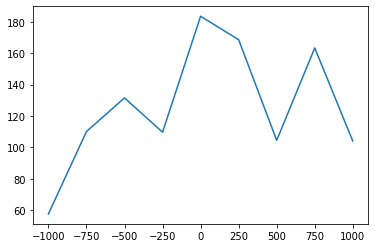

In [30]:
plt.plot(disp,logli)

In [41]:
logli

[518.1186579088359,
 -243891.1859382963,
 -53677.493768489905,
 -31712347.298367072,
 1270.0793793938658,
 -3156.3689172640507,
 -212113.32450955035,
 -16895.904434354543,
 -3912.985727577134]